In [30]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import quad
from IPython.display import HTML

The Biot-Savart law reads $\displaystyle \vec{B}(\vec{r}) = \frac{\mu_0}{4\pi}\int_C\frac{Id \vec{l}\times (\vec{r}-\vec{l})}{|\vec{r}-\vec{l}|^3}$

In [31]:
theta, phi = smp.symbols(r'\theta \phi', cls=smp.Function)
t_param = smp.symbols(r't')
theta = theta(t_param)
phi = phi(t_param)
theta = 20 * t_param
phi = t_param - smp.pi/2
r = smp.symbols('r')
# r = 100 / (100+(theta-smp.pi/2)**8) * (2-smp.sin(7*theta)-smp.cos(30*theta)/2)
r = 0.5

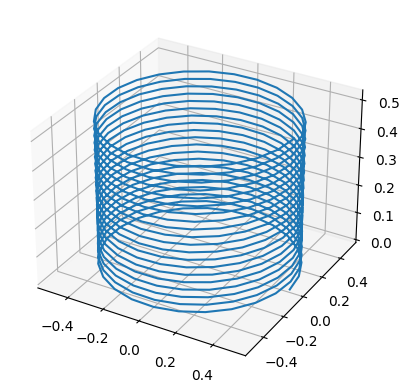

In [32]:
l = r * smp.Matrix([smp.cos(theta), smp.sin(theta), t_param/6])
curvex = smp.lambdify(t_param,l[0])
curvey = smp.lambdify(t_param,l[1])
curvez = smp.lambdify(t_param,l[2])
# t is the number for parametrization
t_min = 0
t_max = 2 * np.pi
t = np.linspace(t_min,t_max, 500)

x = curvex(t)
y = curvey(t)
z = curvez(t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x,y,z)

In [33]:
# in appropriate units
x, y, z = smp.symbols('x y z',cls=smp.Function)
x = x(t_param, r)
y = y(t_param, r)
z = z(t_param, r)
r = smp.Matrix([x,y,z])
integrand = l.diff(t_param).cross(r-l)/(r-l).norm()**3

In [34]:
dBxdt = smp.lambdify([t_param,x,y,z],integrand[0])
dBydt = smp.lambdify([t_param,x,y,z],integrand[1])
dBzdt = smp.lambdify([t_param,x,y,z],integrand[2])
def B(x, y, z):
    return np.array([
        quad(dBydt, t_min, t_max, args=(x,y,z))[0],
        quad(dBxdt, t_min, t_max, args=(x,y,z))[0],
        quad(dBzdt, t_min, t_max, args=(x,y,z))[0],
    ])

# low res
# x = np.linspace(-3,3,16)
# y = np.linspace(-0.5,3.5,12)
# z = np.linspace(-1,1,8)

# high res

x = np.linspace(-0.6,0.6,10)
y = np.linspace(-0.6,0.6,10)
z = np.linspace(0,0.6,10)

xv, yv, zv = np.meshgrid(x,y,z)

B_field = np.vectorize(B, signature='(),(),()->(3)')(xv,yv,zv)

C:\Users\张索\AppData\Local\Temp\ipykernel_56528\1483998801.py:6: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

C:\Users\张索\AppData\Local\Temp\ipykernel_56528\1483998801.py:7: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps 

In [35]:
Bx = B_field[:,:,:,0]
By = B_field[:,:,:,1]
Bz = B_field[:,:,:,2]
# capping = 9000
# exclude = Bx**2+By**2+Bz**2 < capping
# Bx = Bx[exclude]
# By = By[exclude]
# Bz = Bz[exclude]

In [38]:
data = go.Cone(x = xv.ravel(), y=yv.ravel(), z=zv.ravel(),
            u = Bx.ravel(), v = By.ravel(), w = Bz.ravel(),
            colorscale='Inferno', colorbar=dict(title=r'$x^2$'),
            sizemode='absolute', sizeref=300)

layout = go.Layout(title=r'Magnetic field',
                         scene=dict(xaxis_title=r'x',
                                    yaxis_title=r'y',
                                    zaxis_title=r'z',
                                    aspectratio=dict(x=1,y=1,z=1),
                                    camera_eye=dict(x=1.2,y=1.2,z=1.2)))

fig = go.Figure(data=data, layout=layout)
fig.add_scatter3d(x=curvex(t), y=curvey(t), z=curvez(t), mode='lines',line=dict(color='green', width=10))
htmlfig = fig.to_html()
HTML(htmlfig)
with open('./B_result7.html','w',encoding='utf-8') as f:
    f.write(htmlfig)
